# Week15

In [85]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation
# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']
# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups( )의 categories에 cats 입력 
news_df= fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)
# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', 
                             ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data) 
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [86]:
lda = LatentDirichletAllocation(n_components=8, random_state=0) 
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [87]:
print(lda.components_.shape) 
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [88]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        # components, array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환. 
        topic_word_indexes = topic.argsort()[: :-1 ] 
        top_indexes=topic_word_indexes[:no_top_words]
        # top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat 
        feature_concat = ' '.join([feature_names[i] for i in top_indexes]) 
        print(feature_concat)
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names( )를 통해 추출 
feature_names = count_vect.get_feature_names_out()
# 토픽별 가장 연관도가 높은 word를 15개만 추출 
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


In [109]:
import pandas as pd
import glob, os 
import warnings 
warnings.filterwarnings('ignore') 
pd.set_option('display.max_colwidth', 700)
# 다음은 저자의 컴퓨터에서 압축 파일을 풀어놓은 디렉터리이니, 각자 디렉터리를 다시 설정합니다.
path = "C:\\Users\\A\\Desktop\\EURON\\과제\\week12\\OpinosisDataset1.0\\OpinosisDataset1.0\\topics"

# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합 
all_files = glob.glob(os.path.join(path, "*.data")) 
filename_list = [] 
opinion_text = []
# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=None, encoding='latin1')
    # 절대경로로 주어진 파일명을 가공. Linux에서 수행 시에는 아래 \\를 / 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1 ]
    filename_ = filename_.split('.')[0]
    # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename_)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일 내용 리스트를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text}) 
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,"0\n0 , and is very, very accurate .\n1 ..."
1,bathroom_bestwestern_hotel_sfo,"0\n0 The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n1 ..."
2,battery-life_amazon_kindle,0\n0 After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n1 ...
3,battery-life_ipod_nano_8gb,0\n0 short battery life I moved up from an 8gb .\n1 ...
4,battery-life_netbook_1005ha,0\n0 6GHz 533FSB ...


In [110]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# NLTK 리소스 다운로드 (처음 실행 시)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def LemNormalize(text):
    """
    입력 텍스트를 토큰화하고, 소문자 변환, 구두점 제거, 스톱워드 제거,
    표제어(lemmatization)를 적용한 리스트 반환
    """
    # 소문자 변환
    text = text.lower()
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 토큰화
    tokens = word_tokenize(text)
    # 스톱워드 제거 + 표제어 적용
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' ,
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 칼럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [112]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0) 
km_cluster.fit(feature_vect) 
cluster_label = km_cluster.labels_ 
cluster_centers = km_cluster.cluster_centers_

In [113]:
document_df['cluster_label'] = cluster_label 
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,"0\n0 , and is very, very accurate .\n1 ...",2
1,bathroom_bestwestern_hotel_sfo,"0\n0 The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n1 ...",1
2,battery-life_amazon_kindle,0\n0 After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n1 ...,4
3,battery-life_ipod_nano_8gb,0\n0 short battery life I moved up from an 8gb .\n1 ...,4
4,battery-life_netbook_1005ha,0\n0 6GHz 533FSB ...,4


In [115]:
document_df[document_df['cluster_label']==0] .sort_values(by='filename')

,filename,opinion_text,cluster_label
5,buttons_amazon_kindle,"0\n0 I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n1 ...",0
10,eyesight-issues_amazon_kindle,0\n0 It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n1 the whi...,0
12,fonts_amazon_kindle,0\n0 Being able to change the font si...,0
23,navigation_amazon_kindle,0\n0 ...,0
27,price_amazon_kindle,"0\n0 If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n1 ...",0
28,price_holiday_inn_london,0\n0 ...,0


In [116]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"0\n0 The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n1 ...",1
13,food_holiday_inn_london,0\n0 The room was packed to capacity with queues at the food buffets .\n1 ...,1
14,food_swissotel_chicago,0\n0 ...,1
15,free_bestwestern_hotel_sfo,0\n0 The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n1 They also h...,1
20,location_bestwestern_hotel_sfo,"0\n0 Good Value good location , ideal choice .\n1 ...",1
21,location_holiday_inn_london,0\n0 ...,1
24,parking_bestwestern_hotel_sfo,0\n0 Parking was expensive but I think this is common for San Fran .\n1 ...,1
32,room_holiday_inn_london,...,1
30,rooms_bestwestern_hotel_sfo,...,1
31,rooms_swissotel_chicago,0\n0 The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n1 ...,1


In [118]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,"0\n0 , and is very, very accurate .\n1 ...",2
8,directions_garmin_nuvi_255W_gps,0\n0 You also get upscale features like spoken directions including street names and program...,2
9,display_garmin_nuvi_255W_gps,0\n0 3 quot widescreen display was a bonus .\n1 ...,2
19,keyboard_netbook_1005ha,"0\n0 , I think the new keyboard rivals the great hp mini keyboards .\n1 Since the battery life difference is minimum, the only reason to upgrade would be ...",2
33,satellite_garmin_nuvi_255W_gps,0\n0 It's fast to acquire satellites .\n1 If you've ever had a Brand X GPS take you on some strange r...,2
34,screen_garmin_nuvi_255W_gps,0\n0 It is easy to read and when touching the screen it works great !\n1 and zoo...,2
35,screen_ipod_nano_8gb,"0\n0 As always, the video screen is sharp and bright .\n1 ...",2
36,screen_netbook_1005ha,0\n0 Keep in mind that once you get in a room full of lig...,2
41,size_asus_netbook_1005ha,"0\n0 A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps ...",2
43,speed_garmin_nuvi_255W_gps,0\n0 Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n1 ...,2


In [119]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,0\n0 ...,3
7,comfort_toyota_camry_2007,"0\n0 Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n1 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# ...",3
16,gas_mileage_toyota_camry_2007,0\n0 ...,3
17,interior_honda_accord_2008,0\n0 ...,3
18,interior_toyota_camry_2007,"0\n0 First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the...",3
22,mileage_honda_accord_2008,"0\n0 It's quiet, get good gas mileage and looks clean inside and out .\n1 The mileage is great, and I've had to get used t...",3
29,quality_toyota_camry_2007,0\n0 I previously owned a Toyota 4Runner which had incredible build quality and reliabi...,3
37,seats_honda_accord_2008,0\n0 Front seats are very uncomfortable .\n1 ...,3
47,transmission_toyota_camry_2007,0\n0 ...,3


In [120]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,0\n0 After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n1 ...,4
3,battery-life_ipod_nano_8gb,0\n0 short battery life I moved up from an 8gb .\n1 ...,4
4,battery-life_netbook_1005ha,0\n0 6GHz 533FSB ...,4
11,features_windows7,"0\n0 I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n1 ...",4
25,performance_honda_accord_2008,"0\n0 Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n1 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n2 ...",4
26,performance_netbook_1005ha,0\n0 The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n1 ...,4
42,sound_ipod_nano_8gb,0\n0 headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n1 ...,4
44,speed_windows7,"0\n0 Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n1 ...",4
49,video_ipod_nano_8gb,"0\n0 I bought the 8, gig Ipod Nano that has the built, in video camera .\n1 ...",4


In [121]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cl니ster_label 칼럼으로 할당하고 cluster_label 값으로 정렬 
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
25,performance_honda_accord_2008,"0\n0 Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n1 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n2 ...",0
23,navigation_amazon_kindle,0\n0 ...,0
12,fonts_amazon_kindle,0\n0 Being able to change the font si...,0
10,eyesight-issues_amazon_kindle,0\n0 It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n1 the whi...,0
44,speed_windows7,"0\n0 Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n1 ...",0
29,quality_toyota_camry_2007,0\n0 I previously owned a Toyota 4Runner which had incredible build quality and reliabi...,0
27,price_amazon_kindle,"0\n0 If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n1 ...",0
5,buttons_amazon_kindle,"0\n0 I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n1 ...",0
28,price_holiday_inn_london,0\n0 ...,1
21,location_holiday_inn_london,0\n0 ...,1


In [122]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape) 
print(cluster_centers)

cluster_centers shape : (3, 4392)
[[0.00728946 0.00158852 0.         ... 0.         0.         0.        ]
 [0.         0.0033233  0.00106889 ... 0.         0.00128981 0.00103238]
 [0.00969951 0.00097889 0.00040254 ... 0.00884641 0.         0.        ]]


In [124]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                        top_n_features=10): 
    cluster_details = {}
    # cluster.centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력 
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[：z ：：-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features] 
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
        top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                            top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력 
        cluster_details[cluster_num] [ 'top_features' ] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values 
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num] [ 'filename' ] 
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
    return cluster_details

In [128]:
def print_cluster_details(clijster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}',format(cluster_num))
        print('Top features:', cluster_detail['top_features' ])
        print('Reviews 파일명 :', cluster_detail['filenames'][:7])
        print('==================================================')

In [129]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10 ) 
print_cluster_details(cluster_details)

####### Cluster {0} 0
Top features: ['kindle', 'page', 'button', 'font', 'book', 'performance', 'eye', 'quality', 'faster', 'price']
Reviews 파일명 : ['buttons_amazon_kindle', 'eyesight-issues_amazon_kindle', 'fonts_amazon_kindle', 'navigation_amazon_kindle', 'performance_honda_accord_2008', 'price_amazon_kindle', 'quality_toyota_camry_2007']
####### Cluster {0} 1
Top features: ['room', 'hotel', 'service', 'staff', 'interior', 'food', 'location', 'seat', 'mileage', 'comfortable']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'gas_mileage_toyota_camry_2007']
####### Cluster {0} 2
Top features: ['screen', 'battery', 'battery life', 'life', 'keyboard', 'video', 'direction', 'voice', 'map', 'feature']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'directions_g

## 8.8

In [130]:
import numpy as np
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2)))) 
    similarity = dot_product / l2_norm
    
    return similarity

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
    'if you take the red pill, you stay in Wonderland',
    'if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [135]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환. 
feature_vect_dense = feature_vect_simple.todense()
# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, ) 
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출 
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0: .3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도:  0.402


In [136]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, ) 
similarity_simple = cos_similarity(vect1, vect3 ) 
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, ) 
similarity_simple = cos_similarity(vect2, vect3 ) 
print('문장 2, 문장 3 Cosine 유사도: {0: .3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도:  0.456


In [137]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple) 
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [139]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:]) 
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [140]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple) 
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [145]:
import pandas as pd 
import glob, os 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
path = path = "C:\\Users\\A\\Desktop\\EURON\\과제\\week12\\OpinosisDataset1.0\\OpinosisDataset1.0\\topics"
all_files = glob.glob(os.path.join(path, "*.data")) 
filename_list = [] 
opinion_text = []
for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1') 
    filename_ = file_.split('\\')[-1] 
    filename = filename_.split('.')[0] 
    filename_list.append(filename) 
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85 ) 
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0) 
km_cluster.fit(feature_vect) 
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_ 
document_df['cluster_label'] = cluster_label

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출 
hotel_indexes = document_df[document_df['cluster_label']==2] .index 
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)
# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, ' 와 타 문서 유사도######')
''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출 
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.''' 
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes]) 
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([0, 2, 3, 4, 8, 9, 11, 19, 26, 33, 34, 35, 36, 41, 42, 43, 47, 48, 49,
       50],
      dtype='int64')
##### 비교 기준 문서명 accuracy_garmin_nuvi_255W_gps  와 타 문서 유사도######
[[1.         0.02961663 0.03952762 0.0328595  0.34609929 0.19671575
  0.03600012 0.02020024 0.03568734 0.10089749 0.15597527 0.03636922
  0.0335638  0.03304897 0.02959677 0.20138968 0.01646358 0.18374441
  0.01702579 0.12145362]]


가장 유사도가 큰 파일명 및 유사도:
 filename      directions_garmin_nuvi_255W_gps
similarity                           0.346099
Name: 8, dtype: object


Text(0.5, 1.0, 'accuracy_garmin_nuvi_255W_gps')

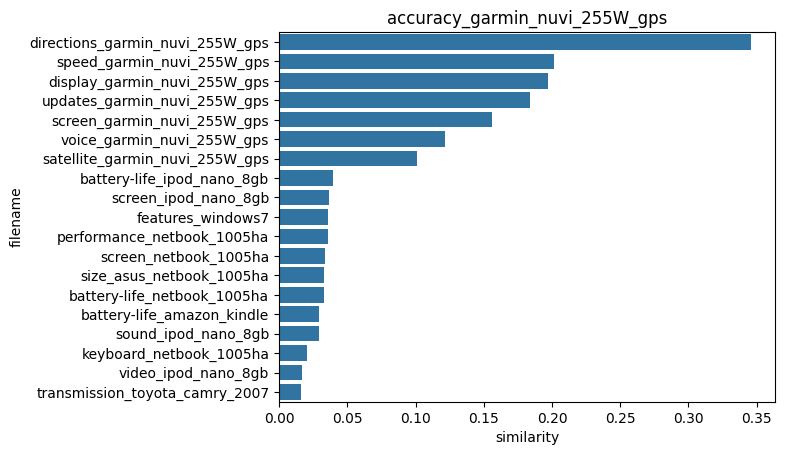

In [154]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1 ]
sorted_index = sorted_index[:, 1:]
# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1 ]
hotel_1_sim_value = hotel_1_sim_value[1:]
# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화 
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])
sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

In [167]:
import pandas as pd
train_df = pd.read_csv(
    'ratings_train.txt',
    sep='\t',
    encoding='utf-8-sig'
)
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [159]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [168]:
import re
train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t', encoding='utf-8-sig')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

In [164]:
pip install kiwipiepy


     ---------------------------------------- 0.0/79.5 MB ? eta -:--:--
      --------------------------------------- 1.6/79.5 MB 9.4 MB/s eta 0:00:09
     - -------------------------------------- 3.4/79.5 MB 9.6 MB/s eta 0:00:08
     -- ------------------------------------- 5.2/79.5 MB 8.9 MB/s eta 0:00:09
     --- ------------------------------------ 6.3/79.5 MB 7.7 MB/s eta 0:00:10
     --- ------------------------------------ 7.9/79.5 MB 7.6 MB/s eta 0:00:10
     ---- ----------------------------------- 9.4/79.5 MB 7.6 MB/s eta 0:00:10
     ----- ---------------------------------- 11.0/79.5 MB 7.6 MB/s eta 0:00:09
     ------ --------------------------------- 12.8/79.5 MB 7.6 MB/s eta 0:00:09
     ------- -------------------------------- 14.4/79.5 MB 7.5 MB/s eta 0:00:09
     -------- ------------------------------- 16.3/79.5 MB 7.7 MB/s eta 0:00:09
     -------- ------------------------------- 17.6/79.5 MB 7.6 MB/s eta 0:00:09
     --------- ------------------------------ 19.4/79.

  DEPRECATION: Building 'kiwipiepy_model' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'kiwipiepy_model'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [172]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

def tw_tokenizer(text):
    # 문자열 아니면 그냥 빈 토큰 반환
    if not isinstance(text, str):
        return []

    # 혹시 모를 인코딩 깨짐 방지
    try:
        tokens = kiwi.tokenize(text)
        return [token.form for token in tokens]
    except Exception:
        return []



In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(
    tokenizer=tw_tokenizer,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9
)

# 학습 데이터 벡터화
tfidf_matrix_train = tfidf_vect.fit_transform(train_df['document'])


In [174]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0, solver='liblinear')
# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = { 'C': [1, 3.5, 4.5, 5.5, 10] }
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1) 
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8659


In [175]:
from sklearn.metrics import accuracy_score
# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])
# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용 
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)
print('Logistic Regression 정확도:', accuracy_score(test_df ['label'], preds))

Logistic Regression 정확도: 0.86852
